# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('https://static.lms.ebaconline.com.br/content-files/b069940e-6854-442b-8b94-b2938a3c938c/original.csv')

df_graf = pd.DataFrame(df)

df_graf = df_graf[['APGAR1','APGAR5','SEXO','GESTACAO','ESTCIVMAE']]
df_graf['SEXO'] = df_graf['SEXO'].replace('Masculino', 1)
df_graf['SEXO'] = df_graf['SEXO'].replace('Feminino', 2)
df_graf['GESTACAO'] = df_graf['GESTACAO'].replace('Menos de 22 semanas', 1)
df_graf['GESTACAO'] = df_graf['GESTACAO'].replace('22 a 27 semanas', 2)
df_graf['GESTACAO'] = df_graf['GESTACAO'].replace('28 a 31 semanas', 3)
df_graf['GESTACAO'] = df_graf['GESTACAO'].replace('32 a 36 semanas', 4)
df_graf['GESTACAO'] = df_graf['GESTACAO'].replace('37 a 41 semanas', 5)
df_graf['GESTACAO'] = df_graf['GESTACAO'].replace('42 semanas e mais', 6)

df_graf = df_graf.head(7)
df_graf

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE
0,9.0,10.0,1.0,5.0,5.0
1,8.0,9.0,2.0,5.0,2.0
2,8.0,10.0,2.0,5.0,9.0
3,9.0,10.0,2.0,5.0,5.0
4,8.0,10.0,2.0,5.0,2.0
5,9.0,10.0,1.0,5.0,5.0
6,9.0,10.0,2.0,5.0,1.0


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

<Axes: >

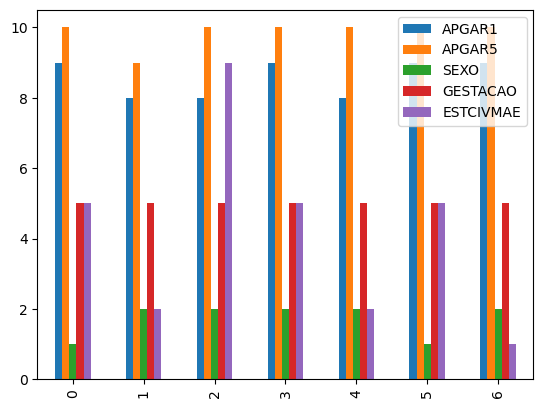

In [43]:
df_graf.plot.bar()


#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

   APGAR1  APGAR5  SEXO  GESTACAO  ESTCIVMAE  CONSULTAS
0     9.0    10.0   1.0       5.0        5.0          4
1     8.0     9.0   2.0       5.0        2.0          4
2     8.0    10.0   2.0       5.0        9.0          4
3     9.0    10.0   2.0       5.0        5.0          3
4     8.0    10.0   2.0       5.0        2.0          4
5     9.0    10.0   1.0       5.0        5.0          4
6     9.0    10.0   2.0       5.0        1.0          4


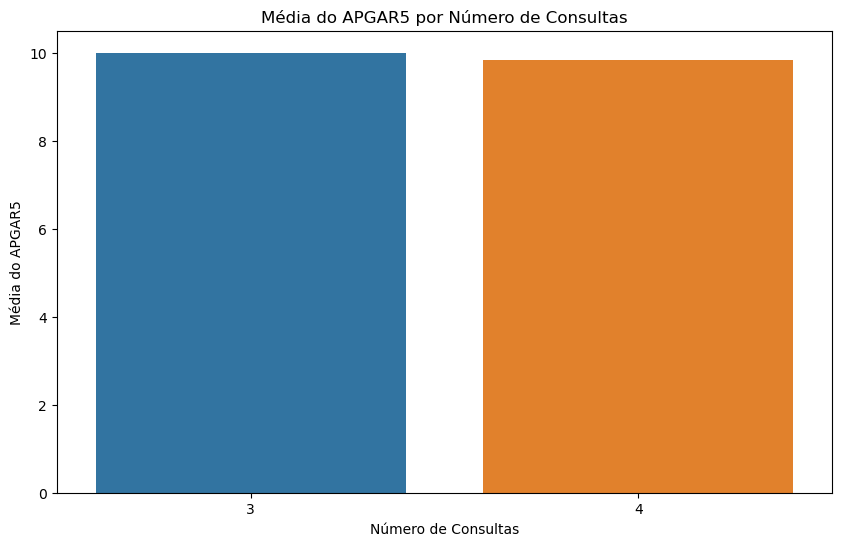

In [54]:
df_graf2 = pd.concat([df_graf, df['CONSULTAS']], axis=1)
df_graf2 = df_graf2.head(7)
print(df_graf2)


apgar5 = df_graf2.groupby('CONSULTAS')['APGAR5'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='CONSULTAS', y='APGAR5', data=apgar5)
plt.title('Média do APGAR5 por Número de Consultas')
plt.xlabel('Número de Consultas')
plt.ylabel('Média do APGAR5')
plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

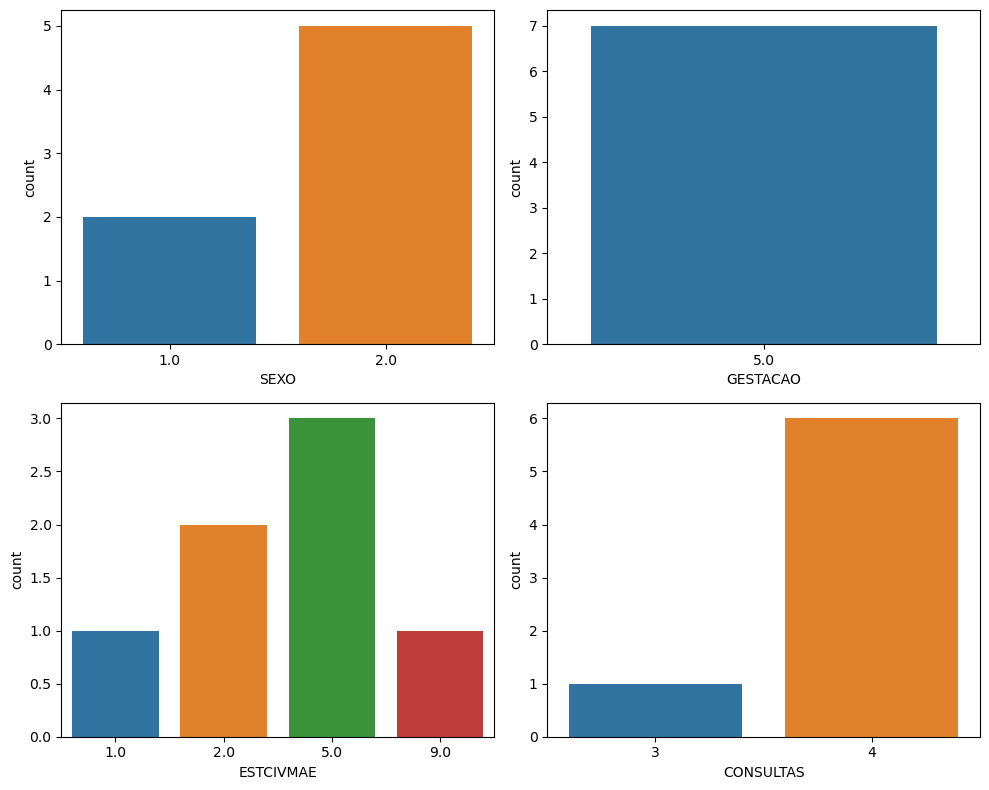

In [55]:
plt.close('all')
plt.rc('figure', figsize=(10, 8))
fig, axes = plt.subplots(2, 2)

sns.countplot(x='SEXO', data=df_graf2, ax=axes[0, 0])
sns.countplot(x='GESTACAO', data=df_graf2, ax=axes[0, 1])
sns.countplot(x='ESTCIVMAE', data=df_graf2, ax=axes[1, 0])
sns.countplot(x='CONSULTAS', data=df_graf2, ax=axes[1, 1])

plt.tight_layout()